# Roration of no hermitian mass matrices

Hermitian term:
    
$\mathcal{L}_{\text{mas}} = \psi^{\dagger} M \psi$
$\to$
$M_{\text{diag}}=U^{-1}MU$

No hermitian term:
 
$\mathcal{L}_{\text{mas}} = \psi_R^{\dagger} M \psi_L = \psi_1^{\dagger} M \psi_2$
$\to$ $\color{red}{M_{\text{diag}}^2=V^{-1}MM^TV = U^{-1}M^TMU}$


ie. the $V$ and $U$ matricess diagonalize the matrices $MM^T$ and $M^TM$ respectively

such that: $\Psi_1^i=V_{ij}\psi_1^j$ and $\Psi_2^i=U_{ij}\psi_2^j$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

DM values

In [3]:
#Experimental values for DM: Planck results 2015
e = 3
Omega = 0.1197
Omega_max=Omega + e*0.0022
Omega_min=Omega - e*0.0022
print(Omega, Omega_min,Omega_max)
# out: (0.1197, 0.1131, 0.1263)

0.1197 0.1131 0.1263


# General scrip

In [4]:
#!/usr/bin/env python

#Import run_dicctionary.py
#This file run a lot of dicctionaryes to run SPheno

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 1

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    MDF = 236.52147710325588
    MS12 = 50680351.35961933
    MS22 = 1231839.8617625898
    LamS1H = 0.
    LamS2H = 0.
    LamSPH = 0.
    LamS = 0.
    LamSP = 0.060737813562248985  
    vS = 565.2190822262443
    YRD = 0.00012930812095796886
    YRC = 0.0110835689775538
    
    # Modific the LesHouches   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    YRA11 = 1.500000E-02
    YRA12 = 2.000000E-02    
    YRA13 = 1.000000E-02
    
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %YRA11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %YRA12     
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %YRA13 
    
    YRA21 = 3.500000E-03
    YRA22 = 2.000000E-03    
    YRA23 = 1.000000E-03
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %YRA21  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %YRA22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %YRA23     

    YRB11 = 1.100000E-04
    YRB12 = 3.000000E-03    
    YRB13 = 1.100000E-03
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %YRB11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %YRB12     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %YRB13 
    
    YRB21 = 1.500000E-04
    YRB22 = 3.000000E-03    
    YRB23 = 1.100000E-03
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %YRB21  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %YRB22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %YRB23      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,\
              YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21'\
                           ,'YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2'\
                          ,'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22'])
#xd.to_csv('xd_neutrinos.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 0.9155764579772949 s running 1 times


In [5]:
#xd=pd.read_csv('xd_neutrinos.csv')

# Analytical rutine for Neutrino mass matriz

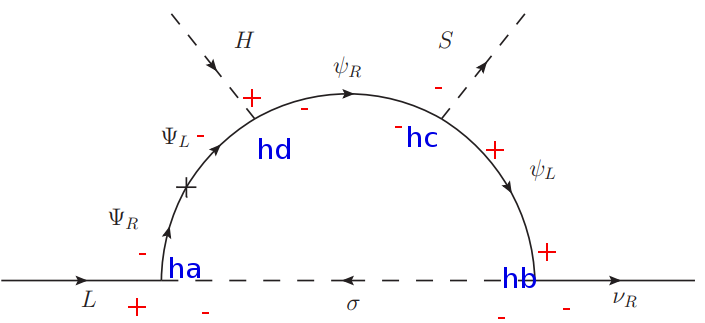

In [21]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

THREE DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^3
\dfrac{V_{k1}U_{k3}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

In [58]:
##Matrix mChi diagonal
def MATRIXCHIDIAG(MDF,vS,YRC,YRD):    
    
    dcOut={}
    
    #Diagonalization of Mchi matrix by the bi-unitary transfortion V and U
    vevSM = 244.874425 #Warning
    MX0 = np.matrix( [[MDF,vevSM*YRD/np.sqrt(2.)],[0.,vS*YRC/np.sqrt(2.)]])
    #squared eigenvalues e eigenvectors for the V MATRIX
    (MVdiag2,V)=np.linalg.eig(MX0*np.transpose(MX0))
    #squared eigenvalues e eigenvectors for the U MATRIX
    (MUdiag2,U)=np.linalg.eig(np.transpose(MX0)*MX0)
    
    if np.sqrt(np.abs(MVdiag2[0])) < np.sqrt(np.abs(MVdiag2[1])):
        
        m1=np.sqrt(np.abs(MVdiag2[0]))
        m2=np.sqrt(np.abs(MVdiag2[1]))
        V11=V[0,0]
        V12=V[0,1]
        V21=V[1,0]
        V22=V[1,1]
        U11=U[0,0]
        U12=U[0,1]
        U21=U[1,0]
        U22=U[1,1]
        
    else:
        
        m1=np.sqrt(np.abs(MVdiag2[1]))
        m2=np.sqrt(np.abs(MVdiag2[0]))
        V11=V[1,0]
        V12=-V[1,1]
        V21=V[0,0]
        V22=-V[0,1]
        U11=U[1,0]
        U12=-U[1,1]
        U21=U[0,0]
        U22=-U[0,1]
    
    dcOut['m1']= m1
    dcOut['m2']= m2  
    dcOut['V11']= V11 
    dcOut['V12']= V12 
    dcOut['V21']= V21 
    dcOut['V22']= V22 
    dcOut['U11']= U11 
    dcOut['U12']= U12 
    dcOut['U21']= U21 
    dcOut['U22']= U22 
            
    return dcOut

In [59]:
#Diagonalization of Mchi matrix by the bi-unitary transfortion V and U
vevSM = 244.874425 #Warning
MX0 = np.matrix( [[xd.MDF[0],vevSM*xd.YRD[0]/np.sqrt(2.)],[0.,xd.vS[0]*xd.YRC[0]/np.sqrt(2.)]])

#squared eigenvalues e eigenvectors for the V MATRIX
(MVdiag2,V)=np.linalg.eig(MX0*np.transpose(MX0))
#squared eigenvalues e eigenvectors for the U MATRIX
(MUdiag2,U)=np.linalg.eig(np.transpose(MX0)*MX0)

In [60]:
print(np.sqrt(np.abs(MVdiag2[0])),np.sqrt(np.abs(MVdiag2[1])))

236.52147816338862 4.429772718833689


In [61]:
#Got analiticaly
MATRIXCHIDIAG(MDF,vS,YRC,YRD)

{'U11': 9.469695439683498e-05,
 'U12': -0.9999999955162433,
 'U21': 0.9999999955162433,
 'U22': 9.469695439683498e-05,
 'V11': 1.7735640343587346e-06,
 'V12': -0.9999999999984273,
 'V21': 0.9999999999984273,
 'V22': 1.7735640343587346e-06,
 'm1': 4.429772718833689,
 'm2': 236.52147816338862}

In [62]:
#Got with SPheno
xd[['XU11','XU12','XU21','XU22','XV11','XV12','XV21','XV22','mChi1','mChi2','MDF']]

,XU11,XU12,XU21,XU22,XV11,XV12,XV21,XV22,mChi1,mChi2,MDF
0,0.000095,-1.0,1.0,0.000095,0.000002,-1.0,1.0,0.000002,4.429773,236.521481,236.521477


In [63]:
###+++++++++ python rutine to get the neutrino eigenvalues +++++++++++++++++++++++++++++

#Loop factor
def Fkk(mNk,mSk,Vk2,Uk1):
    
    mk = 1./(16.*np.pi**2)*Vk2*Uk1*(mNk**3/(mNk**2-mSk**2))*np.log(mNk**2/mSk**2)
    
    return mk   

def Fk(mNk,mSk,Vk2,Uk1):
    
    mk = 1./(16.*np.pi**2)*Vk2*Uk1*mNk*(mNk**2*np.log(mNk**2)-mSk**2*np.log(mSk**2))/(mNk**2-mSk**2)
    
    return mk   

#Mab matrix. sum over i and k is expanded
def Mab(YB1b,YB2b,YA1a,YA2a,m1,m2,ms1,ms2,V12,V22,U11,U21):
    sumS1= (Fk(m1, ms1, V12, U11)+Fk(m2, ms1, V22, U21))*(YB1b*YA1a) 
    
    sumS2= (Fk(m1, ms2, V12, U11)+Fk(m2, ms2, V22, U21))*(YB2b*YA2a) 
    
    return sumS1 + sumS2

def MATRIXDIAG(YB11,YB12,YB13,YB21,YB22,YB23,YA11,YA12,YA13,YA21,YA22,YA23,mS1,mS2,MDF,vS,YRC,YRD):    
    
    #Diagonalization of Mchi matrix by the bi-unitary transfortion V and U
    #v = 246.
    v = 244.874526
    MX0 = np.matrix( [[MDF,v*YRD/np.sqrt(2.)],[0.,vS*YRC/np.sqrt(2.)]])
    #squared eigenvalues e eigenvectors for the V MATRIX
    (MVdiag2,V)=np.linalg.eig(MX0*np.transpose(MX0))
    #squared eigenvalues e eigenvectors for the U MATRIX
    (MUdiag2,U)=np.linalg.eig(np.transpose(MX0)*MX0)
    
    if np.sqrt(np.abs(MVdiag2[0])) < np.sqrt(np.abs(MVdiag2[1])):
        
        m1=np.sqrt(np.abs(MVdiag2[0]))
        m2=np.sqrt(np.abs(MVdiag2[1]))
        V11=V[0,0]
        V12=V[0,1]
        V21=V[1,0]
        V22=V[1,1]
        U11=U[0,0]
        U12=U[0,1]
        U21=U[1,0]
        U22=U[1,1]
        
    else:
        
        m1=np.sqrt(np.abs(MVdiag2[1]))
        m2=np.sqrt(np.abs(MVdiag2[0]))
        V11=V[1,0]
        V12=-V[1,1]
        V21=V[0,0]
        V22=-V[0,1]
        U11=U[1,0]
        U12=-U[1,1]
        U21=U[0,0]
        U22=-U[0,1]
    
    #Matrix elements
    M11 = Mab(YB11,YB21,YA11,YA21,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M12 = Mab(YB11,YB21,YA12,YA22,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M13 = Mab(YB11,YB21,YA13,YA23,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M21 = Mab(YB12,YB22,YA11,YA21,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M22 = Mab(YB12,YB22,YA12,YA22,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M23 = Mab(YB12,YB22,YA13,YA23,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M31 = Mab(YB13,YB23,YA11,YA21,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M32 = Mab(YB13,YB23,YA12,YA22,m1,m2,mS1,mS2,V12,V22,U11,U21)
    M33 = Mab(YB13,YB23,YA13,YA23,m1,m2,mS1,mS2,V12,V22,U11,U21)


    Mvij = np.matrix( [[M11, M12, M13],
                       [M21, M22, M23],
                       [M31, M32, M33]] )

    #eigenvalues e eigenvectors
    (Mdiag2,V)=np.linalg.eig(Mvij*np.transpose(Mvij))
    
    #took eigenvalues
    MX1 = np.sqrt(np.abs(Mdiag2[0]))
    MX2 = np.sqrt(np.abs(Mdiag2[1]))
    MX3 = np.sqrt(np.abs(Mdiag2[2]))
    
    ## reorganize the eigenvalues (neutrino masses)
    mn1 = 0.
    mn2 = 0.
    mn3 = 0.

    if MX1 < MX2 and MX1 < MX3:
        mn1 = MX1
        #print "Hola1"

        if MX2 < MX3:
            mn2 = MX2
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX2  

    if MX2 < MX1 and MX2 < MX3:
        mn1 = MX2
        #print "Hola2" 

        if MX1 < MX3:
            mn2 = MX1
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX1   

    if MX3 < MX1 and MX3 < MX2:
        mn1 = MX3
        #print "Hola3"  

        if MX1 < MX2:
            mn2 = MX1
            mn3 = MX2
        else:
            mn2 = MX2
            mn3 = MX1

    #print("Theoretical values found:")        
    #print(mn1, mn2,mn3)   

    return mn1, mn2, mn3

#run all dataframe
MatrixDiag_new=np.vectorize(MATRIXDIAG,excluded={'vev':246.2,'LAMBDA':1E16},doc='Input for pyfunc below:\
YB11,YB12,YB13,YB21,YB22,YB23,YA11,YA12,YA13,YA21,YA22,YA23,mS1,mS2,MDF,vS,YRC,YRD')

Example:

In [64]:
MATRIXDIAG(YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,mS1,mS2,MDF,vS,YRC,YRD)

(1.272272599951173e-19, 1.3165732617936993e-15, 3.384186656849829e-11)

In [65]:
#Add to the DataFrame
xd['mn1'] = MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,xd.YRA13,\
               xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD)[0]
xd['mn2'] = MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,xd.YRA13,\
               xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD)[1]
xd['mn3'] = MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,xd.YRA13,\
               xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD)[2]

In [66]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

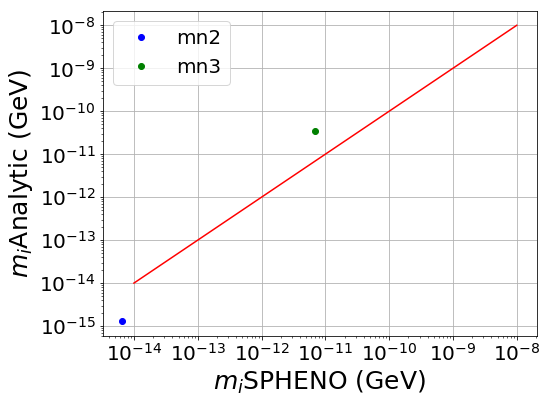

In [67]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mv2,xd.mn2,'bo')
plt.loglog(xd.mv3,xd.mn3,'go')

a = np.linspace(1e-014,1e-08,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

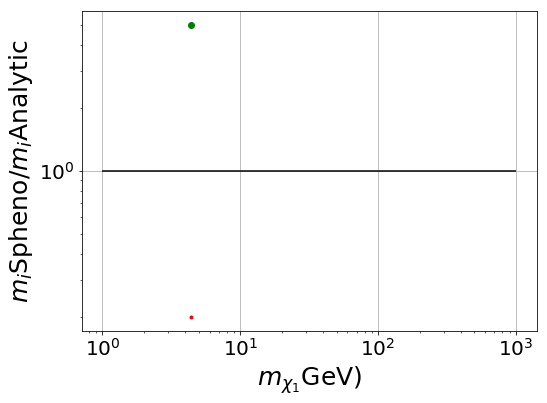

In [68]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog( xd.mChi1, xd.mv2/xd.mn2,'go')
plt.loglog( xd.mChi1, xd.mv3/xd.mn3,'r.')

plt.hlines(1, 1.0E+00, 1.0E+03)

plt.xlabel(r'$m_{\chi_1}$GeV)',size=25)
plt.ylabel(r'$m_i$Spheno/$m_i$Analytic',size=25)

plt.grid()

#plt.ylim(0.9999999,1.0000001)

plt.tight_layout()

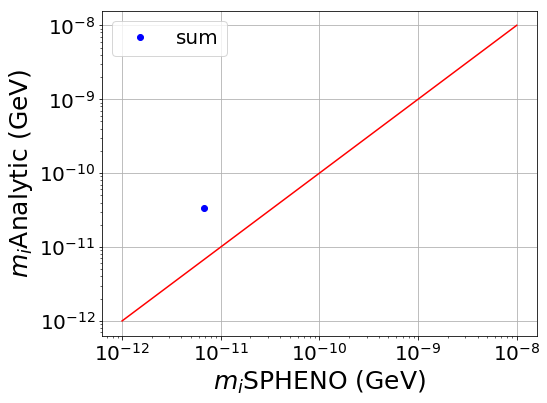

In [13]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog((xd.mv1+xd.mv2+xd.mv3),(xd.mn1+xd.mn2+xd.mn3),'bo',label='sum')

a = np.linspace(1e-012,1e-08,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

Note: when we do the rotation of the Mchi matrix instead of the SPheno the approximation is less accurate.

In [22]:
BP = xd[np.logical_and(xd.mv2/xd.mn2 > 4.6 , 1>0)]

In [23]:
BP

,Unnamed: 0,MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,...,XV12,XV21,XV22,XU11,XU12,XU21,XU22,mn1,mn2,mn3
1,1,236.521477,5.068035e+07,1.231840e+06,0.0,0.0,0.0,0.0,0.060738,565.219082,...,-1.0,1.0,0.000002,0.000095,-1.0,1.0,0.000095,1.272273e-19,1.316573e-15,3.384187e-11


In [24]:
kk=BP[['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD','YRC','YRA11','YRA12','YRA13',\
    'YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21','YRB22','YRB23']]

In [25]:
kk.MDF

1    236.521477
Name: MDF, dtype: float64

In [26]:
kk.to_csv('BP.csv')

In [18]:
xd.columns

Index(['MDF', 'MS12', 'MS22', 'LamS1H', 'LamS2H', 'LamSPH', 'LamS', 'LamSP',
       'vS', 'YRD', 'YRC', 'YRA11', 'YRA12', 'YRA13', 'YRA21', 'YRA22',
       'YRA23', 'YRB11', 'YRB12', 'YRB13', 'YRB21', 'YRB22', 'YRB23', 'mh1',
       'mh2', 'mv3', 'mv2', 'mv1', 'mS1', 'mS2', 'mCha', 'mChi1', 'mChi2',
       'XV11', 'XV12', 'XV21', 'XV22', 'XU11', 'XU12', 'XU21', 'XU22', 'mn1',
       'mn2', 'mn3'],
      dtype='object')

In [20]:
xd.mS2

0    7119.01334
Name: mS2, dtype: float64